## ANN

In [181]:
# 패키지 및 라이브러리 불러오기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [183]:
# 데이터 가져오기

df = pd.read_csv("./sample_data.csv", encoding = "cp949")

In [184]:
# 쓸모없는 행/열 삭제하기

df.drop(['NUMBER', 'name', 'phone_num', 'email',
        'Unnamed: 12','Unnamed: 13'], axis = 1, inplace = True)

num_rows = df.shape[0]
df.drop(num_rows - 1, axis=0, inplace=True)
df

,gender,age,address,funnel,cart_date,buy_yn,buy_date,Goods
0,F,31,강원도 홍천군,Direct,None,N,NaN,NaN
1,M,48,충청남도 공주시,Direct,2022-10-09,Y,2022-10-14,T-shirt
2,M,41,강원도 인제군,Paid,2022-05-03,Y,2022-06-14,bottle
3,M,40,강원도 철원군,Paid,2022-10-26,Y,2022-11-13,bike
4,M,22,경기도 동두천시,Paid,None,N,NaN,NaN
...,...,...,...,...,...,...,...,...
994,F,29,경기도 의정부시,Organic,2022-04-16,Y,2022-08-18,T-shirt
995,F,64,충청남도 공주시,Cross,2022-03-30,Y,2022-07-06,T-shirt
996,M,48,부산광역시,Direct,None,N,NaN,NaN
997,M,37,경상남도 창녕군,Cross,None,N,NaN,NaN


In [185]:
# 날짜 형식으로 변환 후 None값은 0으로 대체

df['buy_date'] = pd.to_datetime(df['buy_date'], errors='coerce')
df['cart_date'] = pd.to_datetime(df['cart_date'], errors='coerce')
df['date_diff'] = (df['buy_date'] - df['cart_date']).dt.days
df['date_diff'] = df['date_diff'].fillna(0).astype(int)

In [186]:
# 구매한 행은 1, 구매하지 않은 행은 0으로 지정한 새로운 열 생성

df['buy_event'] = (df['buy_yn'] == 'Y').astype(int)

In [187]:
df['date_diff'] = (df['buy_date'] - df['cart_date']).dt.days


In [188]:
df.drop(['cart_date', 'buy_date','address'], axis = 1, inplace = True)

In [189]:
df

,gender,age,funnel,buy_yn,Goods,date_diff,buy_event
0,F,31,Direct,N,NaN,NaN,0
1,M,48,Direct,Y,T-shirt,5.0,1
2,M,41,Paid,Y,bottle,42.0,1
3,M,40,Paid,Y,bike,18.0,1
4,M,22,Paid,N,NaN,NaN,0
...,...,...,...,...,...,...,...
994,F,29,Organic,Y,T-shirt,124.0,1
995,F,64,Cross,Y,T-shirt,98.0,1
996,M,48,Direct,N,NaN,NaN,0
997,M,37,Cross,N,NaN,NaN,0


In [190]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [191]:
# 범주형 데이터를 숫자로 변환
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['funnel'] = label_encoder.fit_transform(df['funnel'])
df['Goods'] = label_encoder.fit_transform(df['Goods'])

In [192]:
# 레이블 인코딩
df['buy_yn'] = label_encoder.fit_transform(df['buy_yn'])

In [193]:
# 특성과 레이블 분리
X = df.drop(['buy_yn'], axis=1)
y = df['buy_yn']

In [194]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [213]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [231]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])

In [232]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [233]:
# NaN 값을 확인하는 코드
print(df.isnull().sum())

gender       0
age          0
funnel       0
buy_yn       0
Goods        0
date_diff    0
buy_event    0
dtype: int64


In [234]:
# 'date_diff' 컬럼의 NaN 값을 0으로 대체
df['date_diff'] = df['date_diff'].fillna(0)

In [235]:
# 모델 학습
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.4429 - val_loss: nan - val_accuracy: 0.3938
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4397 - val_loss: nan - val_accuracy: 0.3938
Epoch 8/10
20/20 [==============================] - 0s 2ms/ste

In [236]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'\nTest accuracy: {test_acc}')

7/7 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4550

Test accuracy: 0.45500001311302185


In [237]:
# 학습 과정에서 나오는 히스토리 객체에서 정확도와 손실 추출
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

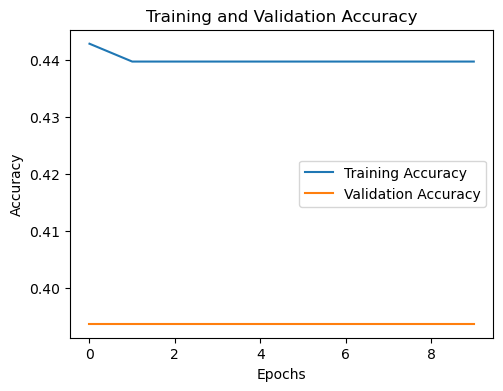

In [238]:
# 에폭별 정확도 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

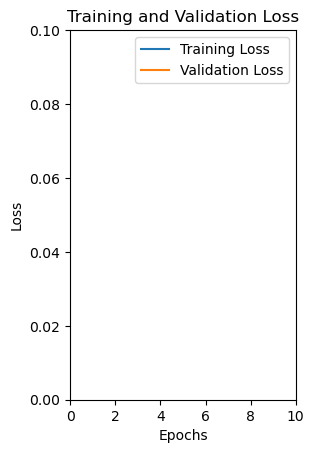

In [239]:
# 에폭별 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# x 축 범위 변경 
plt.xlim(0, 10)

# y 축 범위 변경
plt.ylim(0, 0.1)

plt.show()